<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Crazy Crossfit in 2015</strong></h1>

+ competition and athlete statistics from 2013-2015.
+ The data were scraped in March 2015.
+ some (~20%) user profile pages do not exist. these are mostly athletes who only participated in the earlier years, but there’s no real rhyme or reason to it as far as I can tell.

--------------------

# How did I preprocess the data
> Import python libraries and dataset

> Merge 2 dataframe (atheletes & leaderboard_15)

> Check and drop duplicated rows

> Add labels to data

> Make athlete_id unique

> Drop meaningless columns or unecessary columns: 'retrieved_datetime_x', 'retrieved_datetime_y', 'year', 'stage', 'scaled'

------------


### 1. Data Exploration and Cleaning
+ Data Exploration and Cleaning
+ Merging Data
+ Working With Text Data
+ Preparing Numeric Data
+ Dealing With Dates
+ Frequency Tables
+ Plotting with pandas

### 2. Basic Statistics
+ Descriptive Statistics
+ Probability Distributions
+ Confidence Intervals

### 3. Inferential Statistics
+ Hypothesis Testing
+ Chi-Squared Tests
+ ANOVA
+ Regression Analysis



<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Data Preprocessing</strong></h1>

<a id="1.1"></a>
# 1.1 Importing Necessary Libraries and datasets

In [95]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno

# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [96]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.22.3
Pandas version:  1.4.3
Python 3.10.4


<a id="1.2"></a>
# Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [97]:
# set the general path of the external data
external_data_path = os.path.join(os.path.pardir,'data','external')

# set the path for specific dataset from external dataset
athletes = os.path.join(external_data_path, 'athletes.csv')
leaderboard_15 = os.path.join(external_data_path, 'leaderboard_15.csv')

In [98]:
# import dataset
athletes = pd.read_csv(athletes, delimiter=',', skipinitialspace = True)
# print dataset info
print("The shape and data type of the ORGINAL data:", str(athletes.info()))
# print first 5 rows
athletes.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423006 entries, 0 to 423005
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   athlete_id          423003 non-null  float64
 1   name                331110 non-null  object 
 2   region              251262 non-null  object 
 3   team                155160 non-null  object 
 4   affiliate           241916 non-null  object 
 5   gender              331110 non-null  object 
 6   age                 331110 non-null  float64
 7   height              159869 non-null  float64
 8   weight              229890 non-null  float64
 9   fran                55426 non-null   float64
 10  helen               30279 non-null   float64
 11  grace               40745 non-null   float64
 12  filthy50            19359 non-null   float64
 13  fgonebad            29738 non-null   float64
 14  run400              22246 non-null   float64
 15  run5k               36097 non-null

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,645.0,300.0,NaN,196.0,NaN,NaN,245.0,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,465.0,NaN,1053.0,NaN,NaN,1081.0,205.0,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN


In [99]:
# import dataset
leaderboard_15 = pd.read_csv(leaderboard_15, delimiter=',', skipinitialspace = True)
# print dataset info
print("The shape and data type of the ORGINAL data:", str(leaderboard_15.info()))
# print first 5 rows
leaderboard_15.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572222 entries, 0 to 1572221
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1572222 non-null  int64  
 1   division            1572222 non-null  int64  
 2   stage               1572222 non-null  float64
 3   athlete_id          1572222 non-null  int64  
 4   rank                1165028 non-null  float64
 5   score               1247633 non-null  float64
 6   retrieved_datetime  1572222 non-null  object 
 7   scaled              1572222 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(1)
memory usage: 85.5+ MB
The shape and data type of the ORGINAL data: None


,year,division,stage,athlete_id,rank,score,retrieved_datetime,scaled
0,15,1,5.0,1690,154.0,366.0,2015-03-31T21:44:44,False
1,15,1,5.0,1998,5950.0,497.0,2015-03-31T21:44:44,False
2,15,1,5.0,2206,768.0,404.0,2015-03-31T21:44:44,False
3,15,1,5.0,2559,294.0,379.0,2015-03-31T21:44:44,False
4,15,1,5.0,2811,1946.0,437.0,2015-03-31T21:44:44,False


In [100]:
df = pd.merge(athletes,leaderboard_15,on='athlete_id')
df.head(3)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,5.0,44119.0,771.0,2015-03-31T21:47:26,False
1,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.0,43966.0,130.0,2015-03-31T23:02:54,False
2,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.1,32461.0,225.0,2015-03-31T23:30:57,False


<br><br>
<a id="2.6"></a>
## Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype (string)¶
+ Numeric data should have for example the same number of digits after the point.

In [101]:
print("The shape of the data BEFORE CONVERT is (row, column):", str(df.shape))
print("The data types BEFORE CONVERT are:", df.dtypes, "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

print("The shape of the data AFTER CONVERT is (row, column):", str(df.shape))
print("The data types AFTER CONVERT are:", df.dtypes, "\n\n")

The shape of the data BEFORE CONVERT is (row, column): (1504303, 35)
The data types BEFORE CONVERT are: athlete_id              float64
name                     object
region                   object
team                     object
affiliate                object
gender                   object
age                     float64
height                  float64
weight                  float64
fran                    float64
helen                   float64
grace                   float64
filthy50                float64
fgonebad                float64
run400                  float64
run5k                   float64
candj                   float64
snatch                  float64
deadlift                float64
backsq                  float64
pullups                 float64
eat                      object
train                    object
background               object
experience               object
schedule                 object
howlong                  object
retrieved_datetime_x     object


### Lower Case the content
In this section we will convert all the string value in the column to lowercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string.

In [102]:
# Cast all values inside the dataframe (except the columns' name) into lower case.
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
df.head(3)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554,pj ablang,south west,double edge,double edge crossfit,male,24,70,166,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,220,<NA>,400,305,<NA>,<NA>,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|i r...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|,4+ years|,<NA>,15,1,5.0,44119,771,2015-03-31t21:47:26,False
1,2554,pj ablang,south west,double edge,double edge crossfit,male,24,70,166,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,220,<NA>,400,305,<NA>,<NA>,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|i r...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|,4+ years|,<NA>,15,1,1.0,43966,130,2015-03-31t23:02:54,False
2,2554,pj ablang,south west,double edge,double edge crossfit,male,24,70,166,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,220,<NA>,400,305,<NA>,<NA>,i workout mostly at a crossfit affiliate|i hav...,i played youth or high school level sports|i r...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 2x a week|,4+ years|,<NA>,15,1,1.1,32461,225,2015-03-31t23:30:57,False


<br><br>
<a id="2.8"></a>
## Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
### Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

In [103]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

5
0


In [104]:
# find duplicated athletes id and only keep the last one
# Use the keep parameter to consider only the first instance of a duplicate row to be unique
print(f'Number of duplicated athlete id before: {df.duplicated(subset="athlete_id").sum()}\n')

bool_series = df.duplicated(subset='athlete_id')
print('DataFrame after removing duplicates found in the Name column:')
df = df[~bool_series]
print(f'Number of duplicated athlete id after: {df.duplicated(subset="athlete_id").sum()}\n')
df.info()

Number of duplicated athlete id before: 1253581

DataFrame after removing duplicates found in the Name column:
Number of duplicated athlete id after: 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250717 entries, 0 to 1504297
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   athlete_id            250717 non-null  int64  
 1   name                  250561 non-null  object 
 2   region                250013 non-null  object 
 3   team                  154322 non-null  object 
 4   affiliate             240727 non-null  object 
 5   gender                250561 non-null  object 
 6   age                   250561 non-null  object 
 7   height                118702 non-null  object 
 8   weight                189719 non-null  object 
 9   fran                  41480 non-null   object 
 10  helen                 22348 non-null   object 
 11  grace                 31058 non-null   object 
 12  fi

In [105]:
# print out list of types
print(f'NUMBER OF CATEGORIES: {df.year.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.year.unique()}\n\n\n')

NUMBER OF CATEGORIES: 1; 

UNIQUE NAMES OF THE CATEGORIES [15]





In [106]:
# print out list of types
print(f'NUMBER OF CATEGORIES: {df.division.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.division.unique()}\n\n\n')
# Convert "division" from int to string
df = df.astype({'division':'string'})
df['division'] = df['division'].str.replace(r'1', 'male').replace(r'2', 'female')

print(f'NUMBER OF CATEGORIES after: {df.division.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.division.unique()}\n\n\n')

NUMBER OF CATEGORIES: 2; 

UNIQUE NAMES OF THE CATEGORIES [1 2]



NUMBER OF CATEGORIES after: 2; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
['male', 'female']
Length: 2, dtype: string





In [107]:
# remove pipe?
df['howlong'] = df['howlong'].str.replace(r'\|', '')

In [108]:
# print out list of types
print(f'NUMBER OF CATEGORIES: {df.howlong.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.howlong.unique()}\n\n\n')

NUMBER OF CATEGORIES: 28; 

UNIQUE NAMES OF THE CATEGORIES ['4+ years' '2-4 years' <NA> '1-2 years' '6-12 months'
 'less than 6 months1-2 years' 'less than 6 months' '1-2 years2-4 years'
 'less than 6 months2-4 years' 'decline to answer'
 '1-2 yearsdecline to answer' '2-4 years4+ years'
 'less than 6 months6-12 months' '6-12 months2-4 years'
 '6-12 months1-2 years' '1-2 years4+ years' '2-4 yearsdecline to answer'
 '6-12 months4+ years'
 'less than 6 months6-12 months1-2 years2-4 years4+ yearsdecline to answer'
 'less than 6 months4+ years' '1-2 years2-4 years4+ years'
 '6-12 months1-2 years2-4 years4+ years' '6-12 months1-2 years2-4 years'
 'less than 6 monthsdecline to answer'
 'less than 6 months6-12 months1-2 years2-4 years4+ years'
 '6-12 months1-2 yearsdecline to answer'
 'less than 6 months6-12 months1-2 years'
 'less than 6 months6-12 months1-2 years2-4 years'
 '6-12 monthsdecline to answer']





In [109]:
# print out list of types
print(f'NUMBER OF CATEGORIES: {df.stage.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.stage.unique()}\n\n\n')

NUMBER OF CATEGORIES: 1; 

UNIQUE NAMES OF THE CATEGORIES [5.]





In [110]:
# print out list of types
print(f'NUMBER OF CATEGORIES: {df.scaled.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.scaled.unique()}\n\n\n')

NUMBER OF CATEGORIES: 2; 

UNIQUE NAMES OF THE CATEGORIES [False  True]





In [111]:
# Drop non-needed columns
df = df.drop(['retrieved_datetime_x', 'retrieved_datetime_y', 'year', 'stage', 'scaled', 'howlong'], axis=1)

In [112]:
# df.dropna(axis='rows', inplace=True)

Missing values in the dataframe in descending: 
              Total  Percent
filthy50    236397    94.29
run400      234494    93.53
fgonebad    228925    91.31
helen       228369    91.09
run5k       223837    89.28
grace       219659    87.61
pullups     214832    85.69
fran        209237    83.46
eat         183439    73.17
schedule    180432    71.97
background  179691    71.67
snatch      177732    70.89
experience  175365    69.95
train       174716    69.69
candj       171061    68.23
backsq      167197    66.69
deadlift    164400    65.57
height      132015    52.65
rank        107023    42.69
team         96395    38.45
score        76884    30.67
weight       60998    24.33
affiliate     9990     3.98
region         704     0.28
name           156     0.06
age            156     0.06
gender         156     0.06


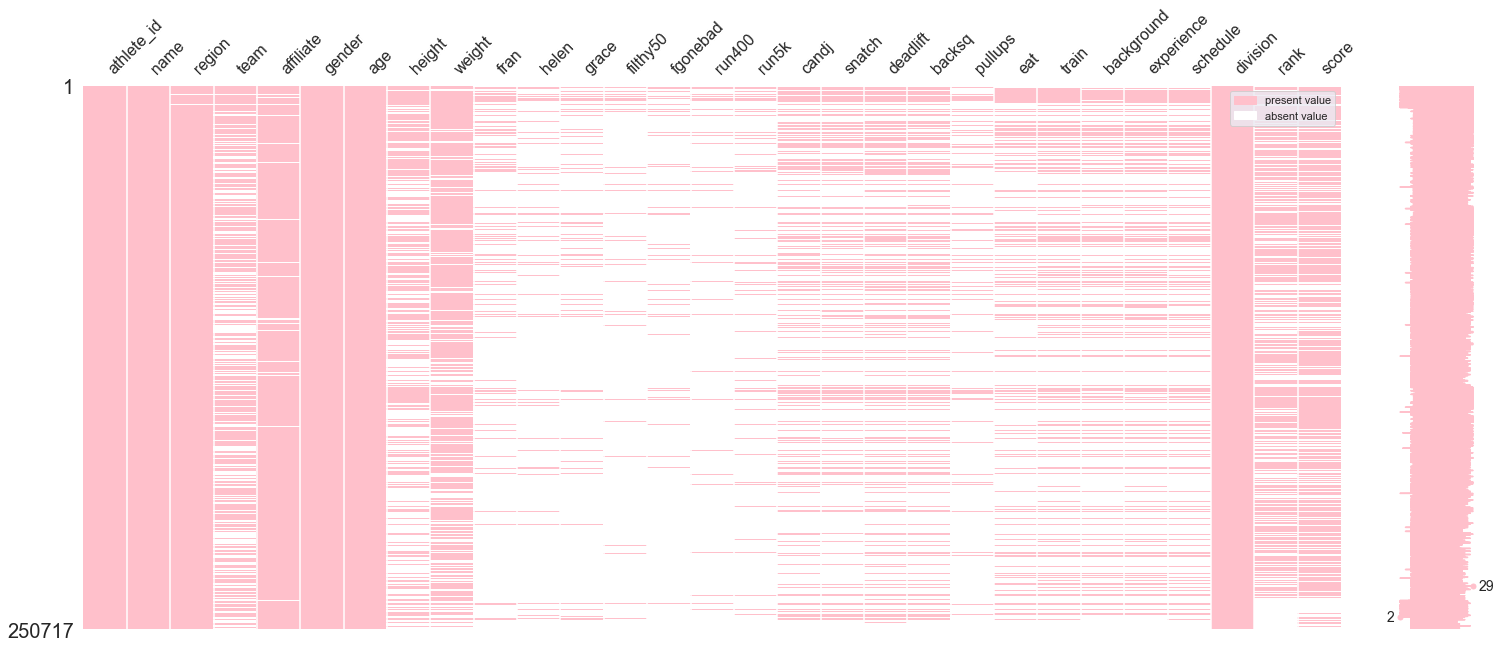

In [113]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250717 entries, 0 to 1504297
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   athlete_id  250717 non-null  int64 
 1   name        250561 non-null  object
 2   region      250013 non-null  object
 3   team        154322 non-null  object
 4   affiliate   240727 non-null  object
 5   gender      250561 non-null  object
 6   age         250561 non-null  object
 7   height      118702 non-null  object
 8   weight      189719 non-null  object
 9   fran        41480 non-null   object
 10  helen       22348 non-null   object
 11  grace       31058 non-null   object
 12  filthy50    14320 non-null   object
 13  fgonebad    21792 non-null   object
 14  run400      16223 non-null   object
 15  run5k       26880 non-null   object
 16  candj       79656 non-null   object
 17  snatch      72985 non-null   object
 18  deadlift    86317 non-null   object
 19  backsq      83520 non-

In [115]:
df.shape

(250717, 29)

<a id="2.11"></a>
# Save the Intermediate data that has been transformed

In [116]:
# set the path of the cleaned data to data and dash
interim_data_path = os.path.join(os.path.pardir,'data','interim')
write_interim_path = os.path.join(interim_data_path, 'cleaned_data.csv')

# To write the data from the data frame into a file, use the to_csv function.
df.to_csv(write_interim_path, index=False)

print("Cleaned data was successfully saved!")

Cleaned data was successfully saved!


<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>References</strong></h1>

[1]"CrossFit Data - dataset by bgadoci", Data.world, 2022. [Online]. Available: https://data.world/bgadoci/crossfit-data. [Accessed: 29- Jul- 2022].

[2]S. Swift, "CrossFit Games Data 2012-2015", Sam Swift, 2022. [Online]. Available: CrossFit Games Data 2012-2015. [Accessed: 29- Jul- 2022].